-------------------------------------------------

##**<center>PROYECTO FINAL: GOOGLE & YELP<center>**

-------------------------------------------------


In [ ]:
# Importar Librerias
from google.colab import drive
import pandas as pd
import os
import json
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Establecer conexión con Drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***DataSet: 'metadata-sitios'***
-------

In [ ]:
# Guardar en una lista todas las rutas de los archivos que contiene la carpeta
metadata_sitios_folder='/content/drive/MyDrive/Proyecto Final/Google Maps/metadata-sitios'
lista_df_parciales=[]
datos=os.listdir(metadata_sitios_folder)
rutas=[os.path.join(metadata_sitios_folder,archivo) for archivo in datos]

Debido a la gran cantidad de datos y teniendo en cuenta los recursos disponibles decidimos no trabajar con la totalidad de los datos sino, leer el 80% de los datos de cada archivo, luego concatenar los dataframes resultantes parciales y obtener un dataframe final.

In [ ]:
for ruta_archivo in rutas:  # leer datos progresivamente e ir añadiendolos al df general
  # Calcula el número total de líneas en el archivo JSON
  with open(ruta_archivo, 'r') as f:
      total_lineas = sum(1 for _ in f)
  # Calcula el número de líneas a leer para obtener el 80%
  n_lineas_80porciento = int(total_lineas * 0.8)
  # Lee solo el 80% de las líneas del archivo JSON
  with open(ruta_archivo, 'r') as f:
      lineas_80porciento = list(islice(f, n_lineas_80porciento))
  # Convierte las líneas en JSON en una lista de diccionarios
  registros_80porciento = [json.loads(line) for line in lineas_80porciento]
  # Convierte la lista de diccionarios en un DataFrame
  df_80porciento = pd.DataFrame(registros_80porciento)
  lista_df_parciales.append(df_80porciento)

df=pd.concat(lista_df_parciales)
df



,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,Hubcap Heaven & Wheels-East,"Hubcap Heaven & Wheels-East, 1905 McClung Ave,...",0x885c1775b68794bb:0xf34025d49d3acc46,None,35.951842,-83.887232,"[Hub cap supplier, Auto parts store]",3.7,3,None,None,None,None,"[0x885c158b0748cf97:0x7ea6986527311414, 0x885c...",https://www.google.com/maps/place//data=!4m2!3...
219996,Tie the Knot Shoppe,"Tie the Knot Shoppe, Hwy50 W & Baltimore, 3631...",0x8713a3ca6c561a1b:0x6219a33d3ddf1494,None,38.309441,-104.635790,"[Bridal shop, Clothing alteration service, Tux...",3.9,36,None,"[[Monday, 11AM–3PM], [Tuesday, 11AM–3PM], [Wed...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 11AM Tue,"[0x8713a21f69b16de3:0x1cf6261aebeed23e, 0x8713...",https://www.google.com/maps/place//data=!4m2!3...
219997,Sarah Shaw Dance Studio,"Sarah Shaw Dance Studio, 967 US-50, Pueblo, CO...",0x8713a22e55e6cd09:0x7c0d7410d7ba5dfb,None,38.309089,-104.621967,[Dance school],4.7,14,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8713a2fe6d8f90a9:0xd816ce5c3747cb2c, 0x8713...",https://www.google.com/maps/place//data=!4m2!3...
219998,Seoul House Restaurant,"Seoul House Restaurant, 128 Manor Ct, Warner R...",0x88f3e1bf47a5a90d:0x436d6eb83a00e609,"Traditional homestyle fare, such as bulgogi & ...",32.619108,-83.614690,[Korean restaurant],4.5,136,$$,"[[Monday, 11AM–7PM], [Tuesday, 11AM–7PM], [Wed...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM Tue,"[0x88f3e1c0c7df57b1:0xc6252be9467da4, 0x88f3e1...",https://www.google.com/maps/place//data=!4m2!3...


De la lectura de los datos se puede observar que contamos con un dataset con 2420000 registros y 15 dimensiones, dicho dataset nos brinda información acerca de distintos negocios de diferentes rubros ubicados en distintos estados de EE..UU, aportandonos datos como la direccion del negocio, id del mismo, numero de reseñas recibidas a traves de google, rubro, latitud y longitud, entre otros datos.

In [ ]:
# Información general
df.info()
# OBS:
  # Tipo incorrecto:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420000 entries, 0 to 219999
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 295.4+ MB


In [ ]:
# Revision de valores nulos
df.isnull().sum()

# Se observa gran cantidad de valores nulos


name                     31
address               64882
gmap_id                   0
description         2220600
latitude                  0
longitude                 0
category              14191
avg_rating                0
num_of_reviews            0
price               2204232
hours                633280
MISC                 556389
state                599045
relative_results     237220
url                       0
dtype: int64

In [ ]:
# Revisar si existen registros con valores nulos en todos sus campos
registros_nulos = df[df.isna().all(axis=1)]
registros_nulos

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url


Se observa que el conjunto de datos no posee registros completamente nulos, se podemos encontrar columnas especificas con una gran cantidad de valores nulos

In [ ]:
# Registros duplicados
df[df.drop(columns=['category','hours','MISC','relative_results']).duplicated()]
# OBS:
  # Se encontraron 26583  registros duplicados

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
26573,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA 31014",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sunday, Closed], [Monday, 8AM–6PM], [Tuesday, 8AM–6PM], [Wednesday, 8AM–12PM], [Thursday, 8AM–6PM]]","{'Service options': ['In-store shopping', 'Same-day delivery'], 'Health & safety': ['Mask required', 'Staff required to disinfect surfaces between visits'], 'Accessibility': ['Wheelchair accessibl...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f16c32716531c1:0x5f19bdaa5044e4fa, 0x88f16e6e3f4a21df:0xcf495da9bb4d89ea]",https://www.google.com/maps/place//data=!4m2!3m1!1s0x88f16e41928ff687:0x883dad4fd048e8f8?authuser=-1&hl=en&gl=us
26574,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, CA 90023",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2c97cb7c52f17:0xb66ee68c1c366f2d]",https://www.google.com/maps/place//data=!4m2!3m1!1s0x80c2c98c0e3c16fd:0x29ec8a728764fdf9?authuser=-1&hl=en&gl=us
26575,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, CA 90005",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM], [Saturday, 6:30AM–6PM], [Sunday, 7AM–12PM], [Monday, Closed], [Tuesday, 6:30AM–6PM], [Wednesday, 6:30AM–6PM]]","{'Service options': ['Takeout', 'Dine-in', 'Delivery'], 'Accessibility': ['Wheelchair accessible entrance'], 'Offerings': ['Comfort food'], 'Amenities': ['Good for kids'], 'Atmosphere': ['Casual']}",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2c79998f75fff:0xd7ca5c67e96fb778, 0x80c2b899146d7507:0xf4162c12c9cf65f8, 0x80c2c77f2d419951:0x26285631b21e324c, 0x80c2b8add9016015:0x15836f81a963b35f]",https://www.google.com/maps/place//data=!4m2!3m1!1s0x80c2c778e3b73d33:0xbdc58662a4a97d49?authuser=-1&hl=en&gl=us
26576,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA 90021",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Saturday, Closed], [Sunday, Closed], [Monday, 9AM–5PM], [Tuesday, 9AM–5PM], [Wednesday, 9AM–5PM]]","{'Service options': ['In-store shopping'], 'Payments': ['Checks', 'Debit cards', 'Credit cards']}",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2c6333ea5aaa7:0x38c93218b0d5751b, 0x80c2c633235effa1:0x384bf96fe70cbbc7, 0x80c2c6295991d031:0x8516999f61103f87, 0x80c2c63331db7ec5:0x507f59d850d36691]",https://www.google.com/maps/place//data=!4m2!3m1!1s0x80c2c89923b27a41:0x32041559418d447?authuser=-1&hl=en&gl=us
26577,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, CA 90021",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Saturday, Closed], [Sunday, Closed], [Monday, 9AM–5PM], [Tuesday, 9AM–5PM], [Wednesday, 9AM–5PM]]",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2c6333ea5aaa7:0x38c93218b0d5751b, 0x80c2c632158d209d:0xe23b0235cc969407, 0x80c2c881faa0ca0f:0xe0806e3c88dbd1]",https://www.google.com/maps/place//data=!4m2!3m1!1s0x80c2c632f933b073:0xc31785961fe826a6?authuser=-1&hl=en&gl=us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA 31014",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sunday, Closed], [Monday, 8AM–6PM], [Tuesday, 8AM–6PM], [Wednesday, 8AM–12PM], [Thursday, 8AM–6PM]]","{'Service options': ['In-store shopping', 'Same-day delivery'], 'Health & safety': ['Mask required', 'Staff required to 

In [ ]:
# indices duplicados
df['gmap_id'][df['gmap_id'].duplicated()]

26573    0x88f16e41928ff687:0x883dad4fd048e8f8
26574    0x80c2c98c0e3c16fd:0x29ec8a728764fdf9
26575    0x80c2c778e3b73d33:0xbdc58662a4a97d49
26576     0x80c2c89923b27a41:0x32041559418d447
26577    0x80c2c632f933b073:0xc31785961fe826a6
                         ...                  
0        0x88f16e41928ff687:0x883dad4fd048e8f8
0        0x88f16e41928ff687:0x883dad4fd048e8f8
0        0x88f16e41928ff687:0x883dad4fd048e8f8
0        0x88f16e41928ff687:0x883dad4fd048e8f8
0        0x88f16e41928ff687:0x883dad4fd048e8f8
Name: gmap_id, Length: 26583, dtype: object

Se obsrva que los datos contienen 26.583 registros duplicados, los mismos serán eliminados del conjunto de datos debido a que hacen referencia a un mismo negocio

In [ ]:
pd.options.display.max_colwidth = 200
df['address']

0                                    Porter Pharmacy, 129 N Second St, Cochran, GA 31014
1                                  City Textile, 3001 E Pico Blvd, Los Angeles, CA 90023
2                                 San Soo Dang, 761 S Vermont Ave, Los Angeles, CA 90005
3                                    Nova Fabrics, 2200 E 11th St, Los Angeles, CA 90021
4                                  Nobel Textile Co, 719 E 9th St, Los Angeles, CA 90021
                                               ...                                      
219995                Hubcap Heaven & Wheels-East, 1905 McClung Ave, Knoxville, TN 37920
219996    Tie the Knot Shoppe, Hwy50 W & Baltimore, 3631 Baltimore Ave, Pueblo, CO 81008
219997                              Sarah Shaw Dance Studio, 967 US-50, Pueblo, CO 81008
219998                     Seoul House Restaurant, 128 Manor Ct, Warner Robins, GA 31093
219999                  Davis Dental Care, 200 Corporate Pointe, Warner Robins, GA 31088
Name: address, Length

In [ ]:
lista_estados= [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]
regex = '|'.join(lista_estados)

In [ ]:
estados=df['address'].str.extract(r'.*?(\b(?:{})\b).*'.format(regex))
estados

,0
0,GA
1,CA
2,CA
3,CA
4,CA
...,...
219995,TN
219996,CO
219997,CO
219998,GA


In [ ]:
# Contiene datos de todos los estados
estados.nunique()

0    50
dtype: int64

In [ ]:
# Estados con mayor cantidad de negocios
top10=estados[0].value_counts().sort_values(ascending=False).iloc[0:10]

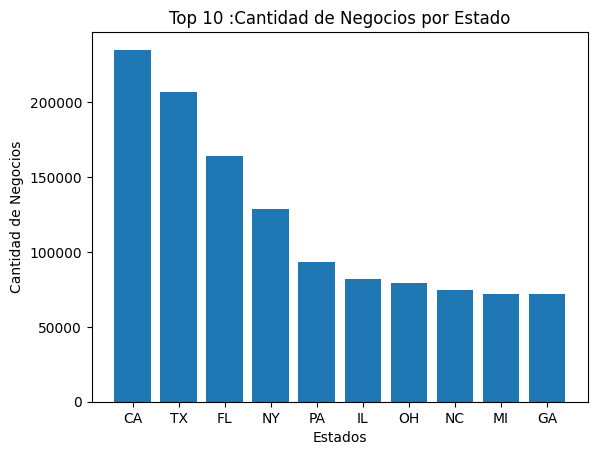

In [ ]:

# Grafico de barras
plt.bar(top10.index,top10)
plt.xlabel('Estados')
plt.ylabel('Cantidad de Negocios')
plt.title('Top 10 :Cantidad de Negocios por Estado')
plt.show()

In [ ]:
# Cantidad de negocios incluidos en el top 10
num_negocios_top10=top10.sum()
# Cantidad total de negocios
num_negocios_sin_duplicados=df['gmap_id'].drop_duplicates().count()


In [ ]:
# Ver que cantidad de negocios del total contiene el top10
valor_final=(num_negocios_top10/num_negocios_sin_duplicados)*100
print(f'El top 10 de estados con mas negocios contiene {num_negocios_top10} negocios lo cual corresponde a un  {valor_final} % del total de negocios')

El top 10 de estados con mas negocios contiene 1206778 negocios lo cual corresponde a un  50.42071649027311 % del total de negocios


In [ ]:
df['category']=df['category'].apply(str).str.strip('[').str.strip(']')

In [ ]:
palabras_gastronomicas = [
    'restaurant', 'bar', 'coffee', 'cafe', 'cuisine', 'chef', 'menu', 'food', 'dish', 'drink',
    'cook', 'recipe', 'culinary', 'taste', 'flavor', 'dining', 'gourmet', 'bistro', 'pub',
    'brewery', 'grill', 'bakery', 'deli', 'sushi', 'pizzeria', 'fast food', 'snack', 'dessert',
    'beverage', 'wine', 'beer', 'cocktail', 'juice', 'spice', 'organic', 'farm-to-table',
    'locally sourced', 'fusion', 'vegetarian', 'vegan', 'gluten-free', 'buffet', 'catering',
    'patio', 'reservation', 'ambiance', 'culinary school', 'foodie', 'gastronomy', 'tasting',
    'savor', 'savory', 'aroma', 'pastry', 'garnish', 'fine dining', 'diner', 'serving',
    'seasoning', 'culinary arts', 'kitchen', 'tableware', 'buffet', 'grill', 'sauce', 'appetizer',
    'entree', 'dessert', 'culinary experience', 'bake', 'roast', 'spice', 'savor', 'tasting menu',
    'farm fresh', 'local produce', 'sustainable', 'dine-in', 'takeout', 'food truck', 'eatery',
    'culinary journey', 'gastropub', 'delicious', 'yummy', 'mouthwatering', 'craving', 'satisfying',
    'refreshing', 'hearty', 'flavorful', 'tasty', 'mouthful', 'epicurean', 'nosh', 'feast',
    'gourmand', 'tantalizing', 'palate', 'delectable', 'savory', 'zing', 'gastronome', 'delightful',
    'mouth-watering', 'gustatory', 'pungent', 'exquisite', 'cuisiner', 'piquant', 'zingy', 'mouthfeel',
    'spicy', 'appetizing', 'succulent', 'toothsome', 'flavor profile', 'umami', 'zest', 'tangy', 'crispy',
    'tender', 'juicy', 'rich', 'creamy', 'smoky', 'decadent', 'piping hot', 'artisanal', 'sizzling', 'zingy',
    'exotic', 'refreshing', 'sophisticated', 'culinary delight', 'flavor burst', 'hearty', 'mouth-coating',
    'indulgent', 'spicy kick', 'luscious', 'taste explosion', 'zesty', 'crunchy', 'fragrant', 'zippy',
    'sweet and savory', 'crave-worthy', 'gustatory pleasure', 'sumptuous', 'exquisite', 'picnic', 'seasonal',
    'farmers market', 'barbecue', 'picnic', 'al fresco', 'fusion cuisine', 'culinary magic', 'bountiful', 'grilled',
    'raw', 'authentic', 'freshly baked', 'culinary artistry', 'food pairing', 'mouth-filling', 'crafted', 'infused',
    'traditional', 'modern', 'homemade', 'classic', 'exotic', 'dolce', 'crust', 'infusion', 'artisan', 'artisanal',
    'decadence', 'fusion', 'gastronomic adventure', 'bake-off', 'culinary genius', 'tasty treat', 'culinary affair',
    'culinary craft', 'gastronomic journey', 'culinary connoisseur', 'culinary ecstasy', 'gastronomic pleasure',
    'mouthwatering sensation', 'tantalizing aroma', 'culinary exploration', 'gourmet delight', 'culinary delight',
    'gastronomic treat', 'flavor symphony', 'taste sensation', 'culinary creation', 'culinary exploration', 'food lover'
]

In [ ]:
df_filtrado = df[df['category'].str.contains('|'.join(palabras_gastronomicas), case=False,na=False)]
df_filtrado

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,'Korean restaurant',4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,'Restaurant',4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"'Bakery', 'Health food restaurant'",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
32,Zymbom Energy Drink,"Zymbom Energy Drink, 5158 Interstate Dr, Shrev...",0x8636d21fba300001:0x42bdd8b8976b3f3d,None,32.458799,-93.823195,'Beverage distributor',3.0,2,None,None,None,None,"[0x8636d21fba0783dd:0x19df388b0a2ba72, 0x86313...",https://www.google.com/maps/place//data=!4m2!3...
36,Luminous Logistics,"Luminous Logistics, 3838 W Miller Rd, Garland,...",0x864ea0993bffffff:0xb50b5bb2fccf9d9b,None,32.893678,-96.688611,'Delivery service',2.3,8,None,None,None,None,"[0x864ea09938bb619f:0x1b6902de2a2f3f96, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219951,Café Florentine,"Café Florentine, 12514 Burbank Blvd, Valley Vi...",0x80c2966d6a5beab5:0x9ad50b976e6ebdba,None,34.171944,-118.405833,"'Kosher restaurant', 'Cafe'",4.7,44,$$,"[[Monday, 10AM–10PM], [Tuesday, 10AM–10PM], [W...","{'Service options': ['Takeout', 'Delivery'], '...",Permanently closed,"[0x80c2966fd965fb61:0xfbd4db2f267ace1f, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
219958,IDK FOODS CRAB SHACK & MORE,"IDK FOODS CRAB SHACK & MORE, 1927 Cumberland A...",0x885c19491a2727b5:0xb830cdf1feabab7,None,35.955410,-83.936507,'Restaurant',4.4,207,$$,None,"{'Service options': ['Takeout'], 'Popular for'...",None,"[0x885c17c5417d5527:0x89368af3f65d11a, 0x885c1...",https://www.google.com/maps/place//data=!4m2!3...
219962,Classic Le Palais Pastry,"Classic Le Palais Pastry, 8670 W Pico Blvd, Lo...",0x80c2b96801a8b3ef:0xd45c84313a84f650,"Straightforward kosher bakery with breads, coo...",34.054049,-118.381018,'Bakery',4.4,44,$$$,"[[Monday, 6AM–3PM], [Tuesday, 6AM–3PM], [Wedne...","{'Service options': ['In-store shopping', 'Tak...",Closed ⋅ Opens 6AM Tue,"[0x80c2b95f10d375dd:0x855ac219813afd28, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
219987,G & D Deli,"G & D Deli, 612 Tipton Station Rd, Knoxville, ...",0x885c1a2b8ffb4fad:0xb9f19c96de09c7b6,None,35.891702,-83.842638,'Deli',4.8,148,$,"[[Monday, 8AM–7PM], [Tuesday, 8AM–7PM], [Wedne...","{'Service options': ['In-store shopping', 'Tak...",Closed ⋅ Opens 8AM Tue,"[0x885c17c154ee555b:0x67a25630f4bebff, 0x885c3...",https://www.google.com/maps/place//data=!4m2!3...


Se encontraron 337.637 negocios pertenecientes al rubro gastronomico

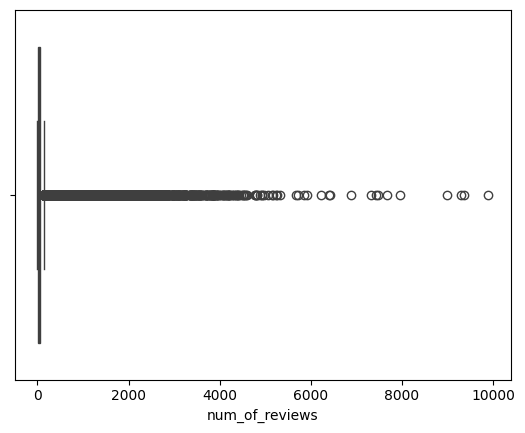

In [ ]:
# Analisis de la columna "num_of_reviews"
sns.boxplot(x=df_filtrado['num_of_reviews'])
plt.show()

A simple vista se observan outliers en los datos, esto es asi dado que encontramos negocios de pequeña embergadura y otros tantos de gran concurrencia, por lo cual se tomarán aquellos negocios con mas de 20 reseñas